**Data 102 Project - Group 53 - Code Notebook**

Note: This notebook was created on Google Colab. Jupyter Hub did not memory / time constraints to handle our large amount of data.

**Pre-Processing / EDA**

In [3]:
pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import bambi as bmb
import arviz as az
from sklearn import preprocessing, tree
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'bambi'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
def eda(data):
    df = data.copy()
    df = df[['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
                         'DF', 'D', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
                         'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'CO2 Emissions Generated']]
    df['Local date'] = pd.to_datetime(df['Local date'], format='%d%b%Y')
    df['day'] = df['Local date'].dt.day
    df['month'] = df['Local date'].dt.month
    df['year'] = df['Local date'].dt.year
    df['dotw'] = df['Local date'].dt.dayofweek
    df = df[df['year'] >= 2019]
    df['Hour'] = df['Hour'] - 1
    df = df[~((df['day'] == 18) & (df['month'] == 11) & (df['year'] == 2024))]
    df = df[~((df['day'] == 17) & (df['month'] == 11) & (df['year'] == 2024))]
    df['D'] = pd.to_numeric(df['D'].str.replace(',', '', regex=False), errors='coerce')
    return df

In [18]:
california = eda(pd.read_csv('/content/drive/MyDrive/california.csv', low_memory=False))
carolinas = eda(pd.read_csv('/content/drive/MyDrive/carolinas.csv', low_memory=False))
central = eda(pd.read_csv('/content/drive/MyDrive/central.csv', low_memory=False))
florida = eda(pd.read_csv('/content/drive/MyDrive/florida.csv', low_memory=False))
mid_atlantic = eda(pd.read_csv('/content/drive/MyDrive/mid_atlantic.csv', low_memory=False))
midwest = eda(pd.read_csv('/content/drive/MyDrive/midwest.csv', low_memory=False))
new_york = eda(pd.read_csv('/content/drive/MyDrive/new_york.csv', low_memory=False))
northwest = eda(pd.read_csv('/content/drive/MyDrive/northwest.csv', low_memory=False))
northeast = eda(pd.read_csv('/content/drive/MyDrive/northeast.csv', low_memory=False))
southeast = eda(pd.read_csv('/content/drive/MyDrive/southeast.csv', low_memory=False))
southwest = eda(pd.read_csv('/content/drive/MyDrive/southwest.csv', low_memory=False))
tennessee = eda(pd.read_csv('/content/drive/MyDrive/tennessee.csv', low_memory=False))
texas = eda(pd.read_csv('/content/drive/MyDrive/texas.csv', low_memory=False))

In [19]:
all_data = [california, carolinas, central, florida, mid_atlantic, midwest, new_york, northwest, northeast,
            southeast, southwest, tennessee, texas]
master = pd.concat(all_data, axis=0, ignore_index=True)
master

,Region,UTC time,Local date,Hour,Local time,Time zone,DF,D,Sum (NG),NG: COL,...,NG: OIL,NG: WAT,NG: SUN,NG: WND,NG: OTH,CO2 Emissions Generated,day,month,year,dotw
0,CAL,01Jan2019 9:00:00,2019-01-01,0,01Jan2019 1:00:00,Pacific,"26,940",26876.0,"18,423","1,778",...,89.0,"2,295",-22,"2,604",779,"5,341",1,1,2019,1
1,CAL,01Jan2019 10:00:00,2019-01-01,1,01Jan2019 2:00:00,Pacific,"25,922",25989.0,"17,613","1,765",...,89.0,"2,002",-22,"2,514",731,"5,174",1,1,2019,1
2,CAL,01Jan2019 11:00:00,2019-01-01,2,01Jan2019 3:00:00,Pacific,"25,159",25295.0,"17,235","1,743",...,88.0,"1,724",-25,"2,539",724,"5,115",1,1,2019,1
3,CAL,01Jan2019 12:00:00,2019-01-01,3,01Jan2019 4:00:00,Pacific,"24,700",24884.0,"17,147","1,727",...,90.0,"1,757",-25,"2,464",727,"5,084",1,1,2019,1
4,CAL,01Jan2019 13:00:00,2019-01-01,4,01Jan2019 5:00:00,Pacific,"24,699",24922.0,"17,553","1,747",...,91.0,"1,962",-26,"2,280",751,"5,245",1,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669859,TEX,17Nov2024 2:00:00,2024-11-16,19,16Nov2024 20:00:00,Central,"48,471",48916.0,"48,334","5,374",...,NaN,4.0,1,"23,626",0,"12,332",16,11,2024,5
669860,TEX,17Nov2024 3:00:00,2024-11-16,20,16Nov2024 21:00:00,Central,"47,212",48221.0,"47,849","4,919",...,NaN,4.0,0,"24,075",0,"11,658",16,11,2024,5
669861,TEX,17Nov2024 4:00:00,2024-11-16,21,16Nov2024 22:00:00,Central,"45,985",47231.0,"46,950","4,722",...,NaN,4.0,0,"23,925",0,"11,213",16,11,2024,5
669862,TEX,17Nov2024 5:00:00,2024-11-16,22,16Nov2024 23:00:00,Central,"44,739",45799.0,"45,592","4,814",...,NaN,4.0,0,"23,976",0,"10,681",16,11,2024,5


**Visualizations**

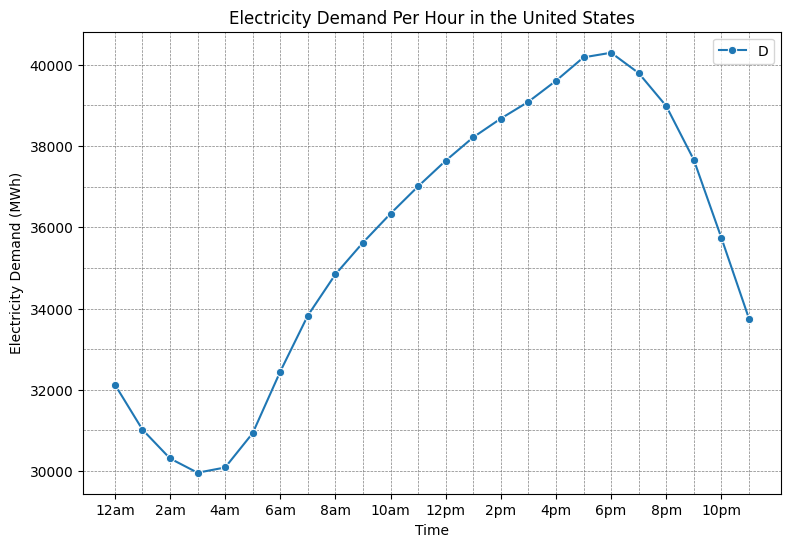

In [21]:
demand_by_hour = master[['Hour', 'D']].groupby('Hour').mean()
demand_by_hour = demand_by_hour.drop(demand_by_hour.index[-1])
fig, ax = plt.subplots(figsize=(9, 6))
for y in np.arange(30000, 40000 + 1, 1000):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
for x in np.arange(0, 23 + 1, 1):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 24, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
sns.lineplot(data=demand_by_hour, markers=True)
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MWh)')
plt.title('Electricity Demand Per Hour in the United States');

There seems to be a gradual incline in terms of electricity demand throughout the day. There is peak demand at 6pm and minimal demand at 3am, which makes sense and aligns with the traditional schedule of when Americans are awake. There does appear to be a trend in terms of how much demand there is at each hour of the day. This suggests that we could potentially predict electric demand. We will apply a generalized linear model (GLM) and non-parametric models to see if we find a good fit..

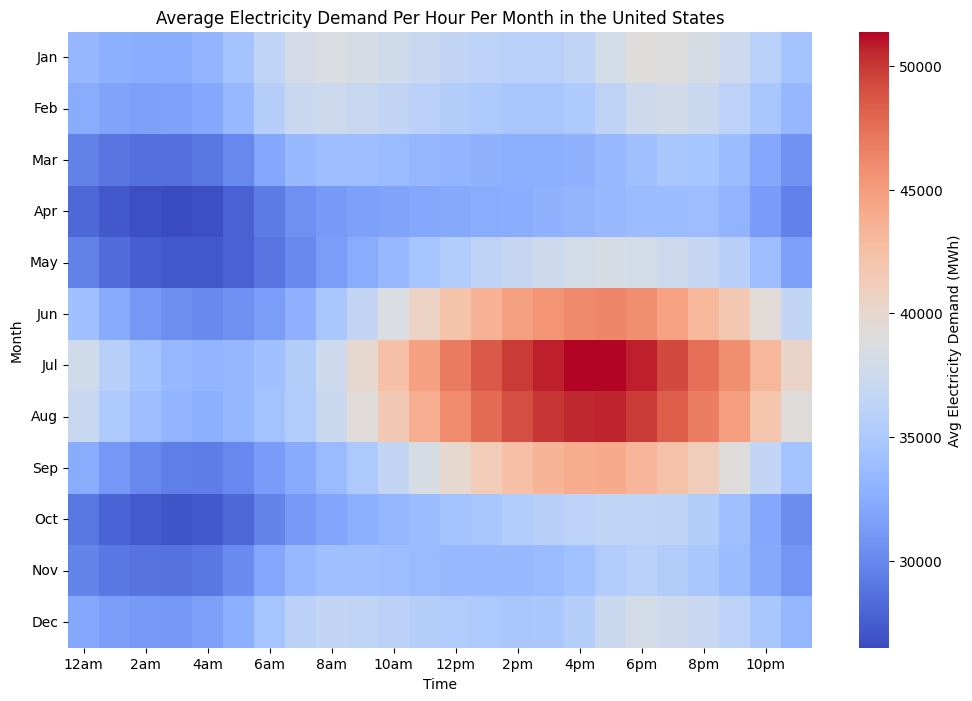

In [22]:
monthly_heatmap_data = master.groupby(['month', 'Hour'])['D'].mean().unstack()
monthly_heatmap_data = monthly_heatmap_data.drop(columns=[24], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(data=monthly_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Electricity Demand (MWh)'})
plt.xticks(np.arange(0.5, 24.5, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.yticks(np.arange(0.5, 12.5, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)
plt.xlabel('Time')
plt.ylabel('Month')
plt.title('Average Electricity Demand Per Hour Per Month in the United States');

Monthly trends are also relevant features. Since it gets hot in the summertime, people naturally start to persistently use air conditioning. Demand seems to be lowered during the Fall and Spring seasons (particularly October and April). Why? Maybe because most people do not necessarily need cooling or heating. It is an ideal temperature. Demand spikes a little in the winter, but not as much as we had anticipated. Timing in months seems to correlate to electric demand.

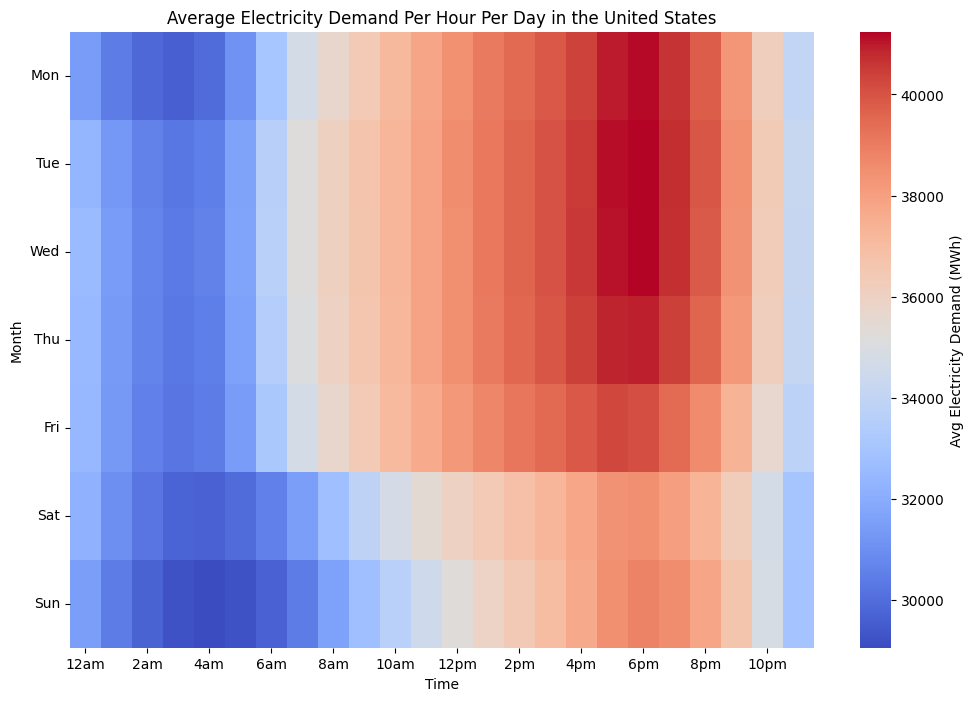

In [23]:
weekly_heatmap_data = master.groupby(['dotw', 'Hour'])['D'].mean().unstack()
weekly_heatmap_data = weekly_heatmap_data.drop(columns=[24], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(data=weekly_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Electricity Demand (MWh)'})
plt.xticks(np.arange(0.5, 24.5, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.yticks(np.arange(0.5, 7.5, 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(rotation=0)
plt.xlabel('Time')
plt.ylabel('Month')
plt.title('Average Electricity Demand Per Hour Per Day in the United States');

There is also a notable difference between weekdays and weekends. There is much less demand for electricity on weekends than on weekdays. Why? Most people work their 8-5 jobs during that time. Many people return home around 5pm, and make dinner, consume media, or do a load of laundry. Maybe people are getting up later on the weekends and not using as much electricity. We can take into account the days of the week when predicting the demand forecast because we believe there is a correlation with electricity demand.


In [24]:
df = master.copy()
# Investigate percentage of missing values
correlation_columns = ['Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'CO2 Emissions Generated']
for var in correlation_columns:
    missing_summary = df[var].isnull().sum() / len(df[var]) * 100
    print(var, ' NaN %: ', missing_summary)

Sum (NG)  NaN %:  0.0
NG: COL  NaN %:  0.19108356323074535
NG: NG  NaN %:  0.00029856806754803957
NG: NUC  NaN %:  0.005075657148316673
NG: OIL  NaN %:  13.552153870039291
NG: WAT  NaN %:  0.0005971361350960791
NG: SUN  NaN %:  0.0016421243715142178
NG: WND  NaN %:  15.38551108881803
CO2 Emissions Generated  NaN %:  0.00029856806754803957


<ipython-input-25-8166e5752af9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].fillna(df[var].median())


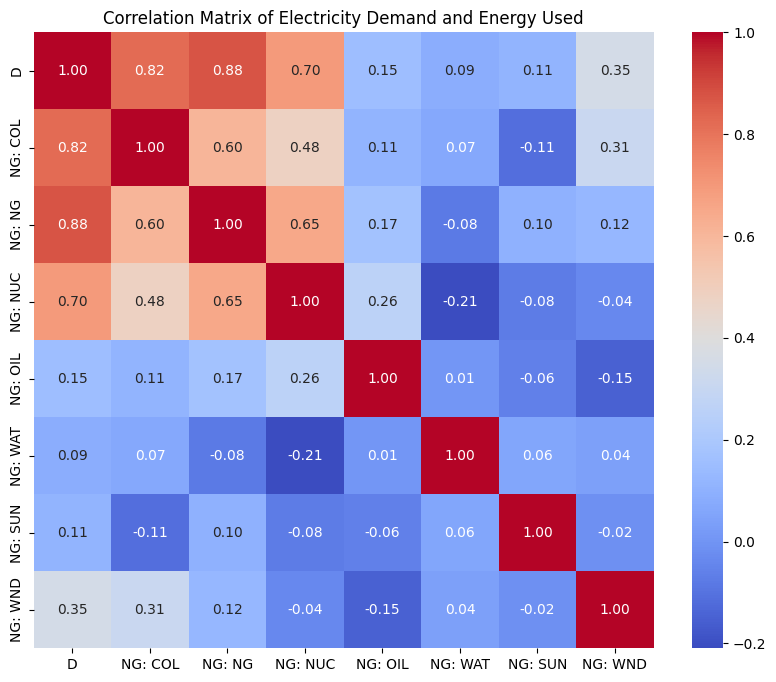

In [25]:
# Convert objects columns to integers
for var in correlation_columns:
    df[var] = df[var].str.replace(',', '')
    df[var] = df[var].str.replace('.', '')
    df[var] = pd.to_numeric(df[var], errors='coerce')
df[correlation_columns]

# Drop missing D rows (only 2), fill remaining missing values with medians
df = df.dropna(subset=['D'])
for var in ['Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND']:
    df[var] = df[var].fillna(df[var].median())

# Create correlation matrix and plot
corr_matrix = df[['D', 'NG: COL', 'NG: NG', 'NG: NUC', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Electricity Demand and Energy Used')
plt.show()

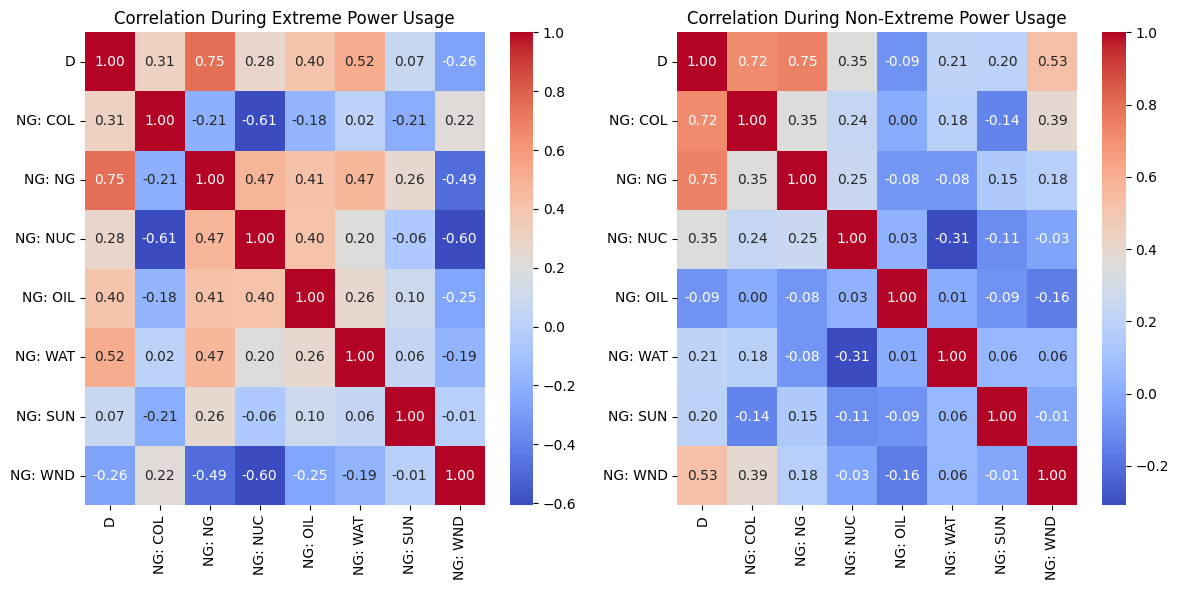

In [26]:
top_10_p = df['D'].quantile(0.90)
df['Top_10'] = df['D'] >= top_10_p

top_10 = df[df['Top_10']]
bottom_90 = df[~df['Top_10']]

extreme_corr = top_10[['D', 'NG: COL', 'NG: NG', 'NG: NUC', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND']].corr()
non_extreme_corr = bottom_90[['D', 'NG: COL', 'NG: NG', 'NG: NUC', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND']].corr()

fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.heatmap(extreme_corr, annot=True, cmap='coolwarm', fmt='.2f',ax=axes[0])
axes[0].set_title('Correlation During Extreme Power Usage')


sns.heatmap(non_extreme_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Correlation During Non-Extreme Power Usage')

plt.tight_layout()
plt.show()

We can see the highest correlation between max temperature and energy demand with 0.74. We also notice fairly strong negative associations with max temperature with precipitation (-0.43) and snowfall (-0.41). This helps highlight the present correlation heat waves can have with energy demand while also showing how strong environmental factors will affect heat waves.

In [5]:
def cal_eda(data):
    df = data.copy()
    df = df[['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
                         'DF', 'D', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
                         'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'CO2 Emissions Generated']]
    df['Local date'] = pd.to_datetime(df['Local date'], format='%d%b%Y')
    df['day'] = df['Local date'].dt.day
    df['month'] = df['Local date'].dt.month
    df['year'] = df['Local date'].dt.year
    df['dotw'] = df['Local date'].dt.dayofweek
    df = df[(df['year'] >= 2016) & (df['year'] <= 2023)]
    df['Hour'] = df['Hour'] - 1
    df['D'] = pd.to_numeric(df['D'].str.replace(',', '', regex=False), errors='coerce')
    return df

In [9]:
california = cal_eda(pd.read_csv('california.csv', low_memory=False))

In [11]:
weather_master = pd.read_csv('weather_master.csv')

weather_master = weather_master[['TMAX', 'DATE']]
weather_master = weather_master.groupby('DATE').mean().reset_index()
california = california[['D', 'Hour', 'Local date']]

In [12]:
california['Local date'] = pd.to_datetime(california['Local date']).dt.date
weather_master['DATE'] = pd.to_datetime(weather_master['DATE']).dt.date

In [13]:
merged = pd.merge(
        california,
        weather_master,
        left_on="Local date",
        right_on="DATE",
        how="right"
    )

In [17]:
# Step 1: Calculate the 95th percentile of TMAX
tmax_95th_percentile = merged['TMAX'].quantile(0.95)

# Step 2: Filter the DataFrame for days with TMAX in the 5th percentile highest temperatures
merged['Extreme'] = merged['TMAX'] >= tmax_95th_percentile

In [19]:
merged['Local date'] = pd.to_datetime(merged['Local date'])
merged['dotw'] = merged['Local date'].dt.weekday

In [21]:
demand_by_hour_non_extreme = merged[merged['Extreme'] == False][['Hour', 'D']].groupby('Hour').mean()
demand_by_hour_non_extreme = demand_by_hour_non_extreme.drop(demand_by_hour_non_extreme.index[-1])

demand_by_hour_extreme = merged[merged['Extreme'] == True][['Hour', 'D']].groupby('Hour').mean()
demand_by_hour_extreme = demand_by_hour_extreme.drop(demand_by_hour_extreme.index[-1])

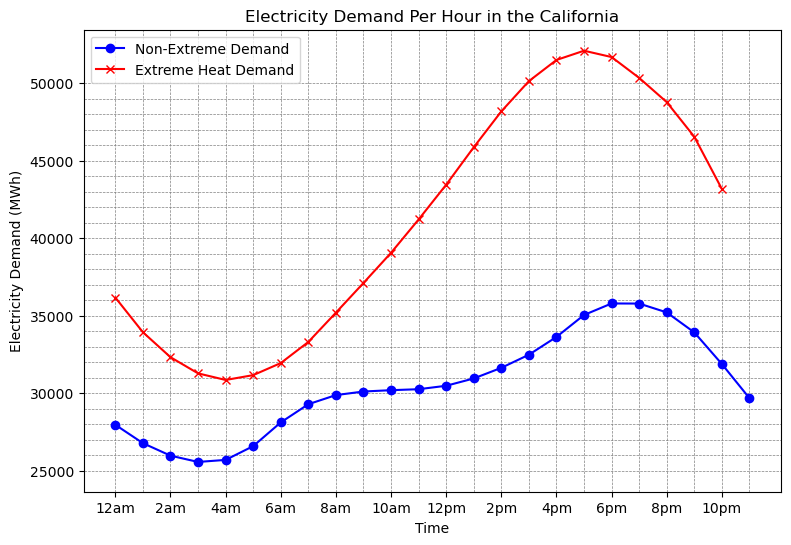

In [25]:
fig, ax = plt.subplots(figsize=(9, 6))
for y in np.arange(25000, 50000 + 1, 1000):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
for x in np.arange(0, 23 + 1, 1):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 24, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.plot(demand_by_hour_non_extreme.index, demand_by_hour_non_extreme['D'], label='Non-Extreme Demand', color='blue', marker='o')
plt.plot(demand_by_hour_extreme.index, demand_by_hour_extreme['D'], label='Extreme Heat Demand', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MWh)')
plt.legend()
plt.title('Electricity Demand Per Hour in the California')
plt.savefig("EDA_Q1.png");

This graph (in MWh) demonstrates that on average, at all times of the day electricity demand is higher on days exhibiting "extreme heat". The biggest difference in the graph between the two is at around 4-6 PM, which also lines up with what are generally the peak electricity demand hours. We will determine to what extent this difference we see in this graph is causal. 

**Research Question 1:** What is the causal effect of extreme heat on electricity demand in California?

In [28]:
from IPython.display import Image
from graphviz import Digraph

In [29]:
# Generates the causal diagram - this image can be found within the final report.

dot = Digraph()
dot.node('A', 'Extreme Heat')
dot.node('B', 'Electricity Demand')
dot.node('C', 'Weekday')
dot.node('D', 'Month')
dot.node('E', 'Year')
dot.node('F', 'Weather (Rain, Snow, Wind)')
dot.node('G', 'C02 Generation')

dot.edges(['AB', 'CA', 'CB', 'DA', 'DB', 'EA', 'EB', 'FA', 'FB', 'AG', 'BG'])
dot.render('Extreme_Heat_Diagram', format='png', cleanup=True)

'Extreme_Heat_Diagram.png'

In [31]:
# This function is utilized to perform some cleaning on the data - this is taken directly from the EDA section

def eda_q1(data):
    df = data.copy()
    df = df[['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
                         'DF', 'D', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
                         'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'CO2 Emissions Generated']]
    df['Local date'] = pd.to_datetime(df['Local date'], format='%d%b%Y')
    df['day'] = df['Local date'].dt.day
    df['month'] = df['Local date'].dt.month
    df['year'] = df['Local date'].dt.year
    df['dotw'] = df['Local date'].dt.dayofweek
    df = df[(df['year'] >= 2016) & (df['year'] <= 2023)]
    df['Hour'] = df['Hour'] - 1
    df['D'] = pd.to_numeric(df['D'].str.replace(',', '', regex=False), errors='coerce')
    df['D'] = df['D'] / 1000
    return df

In [33]:
# Read California dataset and perform basic cleaning

california = eda_q1(pd.read_csv('/content/drive/MyDrive/california.csv', low_memory=False))
# Ensure columns are in numeric form

california['NG: SUN'] = pd.to_numeric(california['NG: SUN'], errors='coerce')
california['NG: WND'] = pd.to_numeric(california['NG: WND'], errors='coerce')
# Group the dataset by date, summing demand and relevant NG columns

cal_bydate = california.groupby('Local date')[['D', 'NG: SUN', 'NG: WND']].sum().reset_index()
# Clean date related columns

cal_bydate['Local date'] = pd.to_datetime(cal_bydate['Local date'], format='%d%b%Y')
cal_bydate['day'] = cal_bydate['Local date'].dt.day
cal_bydate['month'] = cal_bydate['Local date'].dt.month
cal_bydate['year'] = cal_bydate['Local date'].dt.year
cal_bydate['dotw'] = cal_bydate['Local date'].dt.dayofweek

cal_bydate

,Local date,D,NG: SUN,NG: WND,day,month,year,dotw
0,2016-01-01,689.307,0.0,0.0,1,1,2016,4
1,2016-01-02,690.124,0.0,0.0,2,1,2016,5
2,2016-01-03,674.717,0.0,0.0,3,1,2016,6
3,2016-01-04,732.453,0.0,0.0,4,1,2016,0
4,2016-01-05,757.620,0.0,0.0,5,1,2016,1
...,...,...,...,...,...,...,...,...
2917,2023-12-27,699.599,-194.0,7360.0,27,12,2023,2
2918,2023-12-28,690.170,372.0,5189.0,28,12,2023,3
2919,2023-12-29,679.225,11.0,11161.0,29,12,2023,4
2920,2023-12-30,659.481,502.0,4064.0,30,12,2023,5


In [34]:
# A collection of weather data in California from 2016-2023 record by NOAA

weather_master = pd.read_csv('/content/drive/MyDrive/weather_master.csv')

In [35]:
# Fill NaN values with 0s

weather_master['PRCP'] = weather_master['PRCP'].fillna(0)
weather_master['SNOW'] = weather_master['SNOW'].fillna(0)
weather_master['AWND'] = weather_master['AWND'].fillna(0)
# Drop average and min columns and group by date - we only utilize temperature max

max_master = weather_master.drop(columns=['TAVG', 'TMIN'])
max_master = max_master.dropna(subset=['TMAX'])
max_master = max_master.groupby('DATE').mean().reset_index()
max_master

,DATE,AWND,PRCP,SNOW,TMAX
0,2016-01-01,0.673798,0.000353,0.003193,46.576471
1,2016-01-02,0.551973,0.002488,0.001658,48.920398
2,2016-01-03,0.633372,0.006017,0.000000,51.752066
3,2016-01-04,0.678843,0.056992,0.004132,51.669421
4,2016-01-05,1.080867,0.404288,0.027823,48.569558
...,...,...,...,...,...
2794,2023-12-27,0.733477,0.056360,0.000000,57.156757
2795,2023-12-28,0.542432,0.048486,0.005405,59.099099
2796,2023-12-29,0.774195,0.093978,0.001808,59.365280
2797,2023-12-30,0.717208,0.172956,0.011861,53.313869


In [36]:
# Ensure the Local date in energy data is in date format (strip time if necessary)
cal_bydate['Local date'] = pd.to_datetime(cal_bydate['Local date']).dt.date

# Ensure the DATE in temperature data is in date format
max_master['DATE'] = pd.to_datetime(max_master['DATE']).dt.date

# Combine data into one table
combined_data = pd.merge(
    cal_bydate,
    max_master,
    left_on="Local date",
    right_on="DATE",
    how="inner"
)

# Drop the duplicate 'DATE' column
combined_data.drop(columns=["DATE"], inplace=True)
combined_data

,Local date,D,NG: SUN,NG: WND,day,month,year,dotw,AWND,PRCP,SNOW,TMAX
0,2016-01-01,689.307,0.0,0.0,1,1,2016,4,0.673798,0.000353,0.003193,46.576471
1,2016-01-02,690.124,0.0,0.0,2,1,2016,5,0.551973,0.002488,0.001658,48.920398
2,2016-01-03,674.717,0.0,0.0,3,1,2016,6,0.633372,0.006017,0.000000,51.752066
3,2016-01-04,732.453,0.0,0.0,4,1,2016,0,0.678843,0.056992,0.004132,51.669421
4,2016-01-05,757.620,0.0,0.0,5,1,2016,1,1.080867,0.404288,0.027823,48.569558
...,...,...,...,...,...,...,...,...,...,...,...,...
2794,2023-12-27,699.599,-194.0,7360.0,27,12,2023,2,0.733477,0.056360,0.000000,57.156757
2795,2023-12-28,690.170,372.0,5189.0,28,12,2023,3,0.542432,0.048486,0.005405,59.099099
2796,2023-12-29,679.225,11.0,11161.0,29,12,2023,4,0.774195,0.093978,0.001808,59.365280
2797,2023-12-30,659.481,502.0,4064.0,30,12,2023,5,0.717208,0.172956,0.011861,53.313869


In [37]:
# Calculate quantiles and filter

prcp_threshold = combined_data['PRCP'].quantile(0.90)
snow_threshold = combined_data['SNOW'].quantile(0.90)
wind_threshold = combined_data['AWND'].quantile(0.90)


combined_data['Significant_Rain'] = (combined_data['PRCP'] > prcp_threshold).astype(int)
combined_data['Significant_Snow'] = (combined_data['SNOW'] > snow_threshold).astype(int)
combined_data['Significant_Wind'] = (combined_data['AWND'] > snow_threshold).astype(int)
percentiles = combined_data.groupby('month')['TMAX'].quantile(0.95).reset_index()
percentiles.columns = ['month', 'TMAX_95th']

combined_data = combined_data.merge(percentiles, on='month', how='left')

combined_data['Extreme'] = combined_data['TMAX'] >= combined_data['TMAX_95th']

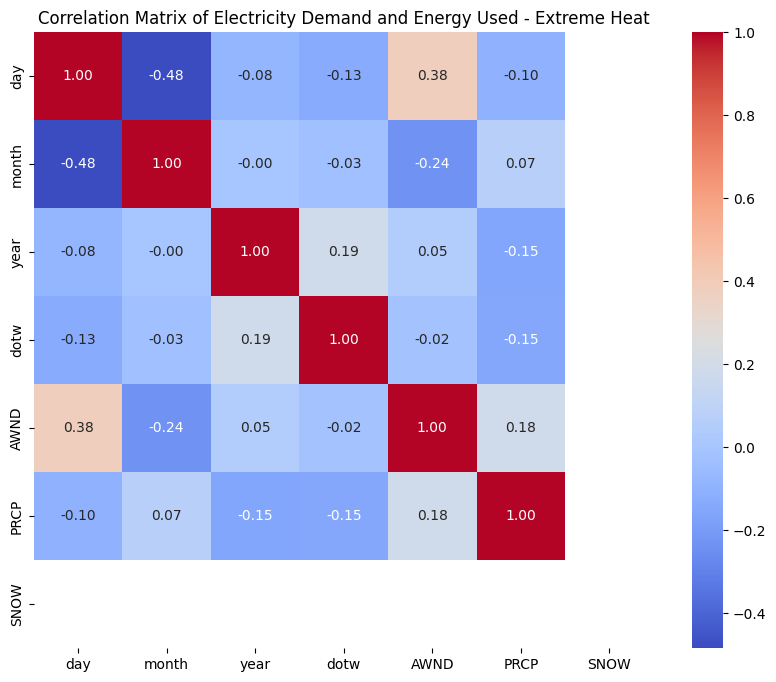

In [38]:
# Compare confounding variable correlation matrices between extreme heat days and non-extreme heat days.

correlation_columns = ['day', 'month', 'year', 'dotw', 'AWND', 'PRCP', 'SNOW']

extreme_days = combined_data[combined_data["Extreme"] == True]
normal_days = combined_data[combined_data["Extreme"] == False]

# Create correlation matrix and plot
corr_matrix = extreme_days[['day', 'month', 'year', 'dotw', 'AWND', 'PRCP', 'SNOW']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Electricity Demand and Energy Used - Extreme Heat')
plt.savefig("Correlation of Electricity Demand and Energy Used.png")
plt.show()

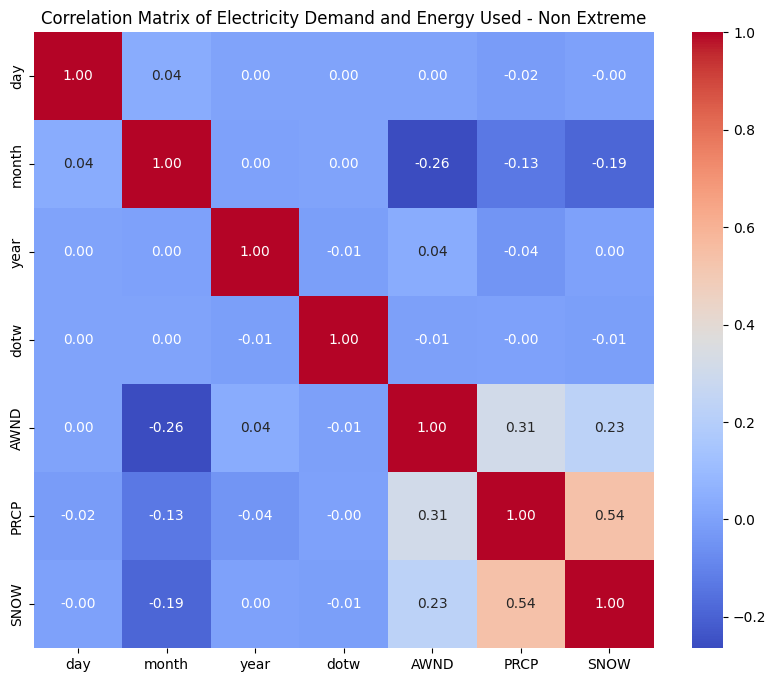

In [39]:
corr_matrix = normal_days[['day', 'month', 'year', 'dotw', 'AWND', 'PRCP', 'SNOW']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Electricity Demand and Energy Used - Non Extreme')
plt.savefig("Correlation of Electricity Demand and Energy Used.png")
plt.show()

**Matching**
We will utilize matching, joining extreme weather days to non-extreme weather days that share the same day of the week, month, and significant weather attributes. After matching these events we will take the averaged difference between the energy demand of the treated days (days with extreme heat) and untreated days.

In [40]:
treated = combined_data[combined_data['Extreme'] == 1]
untreated = combined_data[combined_data['Extreme'] == 0]
# Covariates to use for matching
matching_covariates = ['dotw', 'month', 'Significant_Rain', 'Significant_Snow', 'Significant_Wind']

# Merge treated and untreated on matching columns
matched_pairs = pd.merge(
    treated,
    untreated,
    on=matching_covariates,
    suffixes=('_treated', '_untreated')
)
matched_pairs

,Local date_treated,D_treated,NG: SUN_treated,NG: WND_treated,day_treated,month,year_treated,dotw,AWND_treated,PRCP_treated,...,NG: SUN_untreated,NG: WND_untreated,day_untreated,year_untreated,AWND_untreated,PRCP_untreated,SNOW_untreated,TMAX_untreated,TMAX_95th_untreated,Extreme_untreated
0,2016-02-09,719.317,0.0,0.0,9,2,2016,1,0.609738,0.000000,...,0.0,0.0,23,2016,0.678993,0.001191,0.000000,67.114094,71.322869,False
1,2016-02-09,719.317,0.0,0.0,9,2,2016,1,0.609738,0.000000,...,0.0,0.0,14,2017,0.509543,0.007310,0.010152,64.018613,71.322869,False
2,2016-02-09,719.317,0.0,0.0,9,2,2016,1,0.609738,0.000000,...,0.0,0.0,6,2018,0.718194,0.000117,0.000000,68.043478,71.322869,False
3,2016-02-09,719.317,0.0,0.0,9,2,2016,1,0.609738,0.000000,...,0.0,0.0,13,2018,0.698569,0.006246,0.019192,55.134680,71.322869,False
4,2016-02-09,719.317,0.0,0.0,9,2,2016,1,0.609738,0.000000,...,0.0,0.0,20,2018,0.667339,0.003881,0.019492,45.961017,71.322869,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,2023-12-16,678.531,-84.0,11224.0,16,12,2023,5,0.526606,0.000219,...,-348.0,7599.0,17,2022,0.509962,0.000095,0.000000,52.041588,64.681460,False
3792,2023-12-16,678.531,-84.0,11224.0,16,12,2023,5,0.526606,0.000219,...,991.0,9251.0,24,2022,0.509924,0.004106,0.000000,61.159696,64.681460,False
3793,2023-12-16,678.531,-84.0,11224.0,16,12,2023,5,0.526606,0.000219,...,336.0,879.0,2,2023,0.723509,0.045636,0.000909,55.012727,64.681460,False
3794,2023-12-16,678.531,-84.0,11224.0,16,12,2023,5,0.526606,0.000219,...,467.0,3515.0,9,2023,0.824991,0.004102,0.003630,56.034483,64.681460,False


In [41]:
att = (matched_pairs['D_treated'] - matched_pairs['D_untreated']).mean()
att

95.80809430979977

This outcome indicates that days exhibiting "extreme" heat (temperatures in the upper 5%) cause a roughly 95.8 gigawatt increase in demand. Though, this value can change as we change our definitions of what "extreme" heat and "significant weather" is considered. Lowering the threshold of what is considered extreme heat will likely decrease this outcome. Let's consider what this change might look like to get a sense of the causation of various maximum temperatures on energy demand.

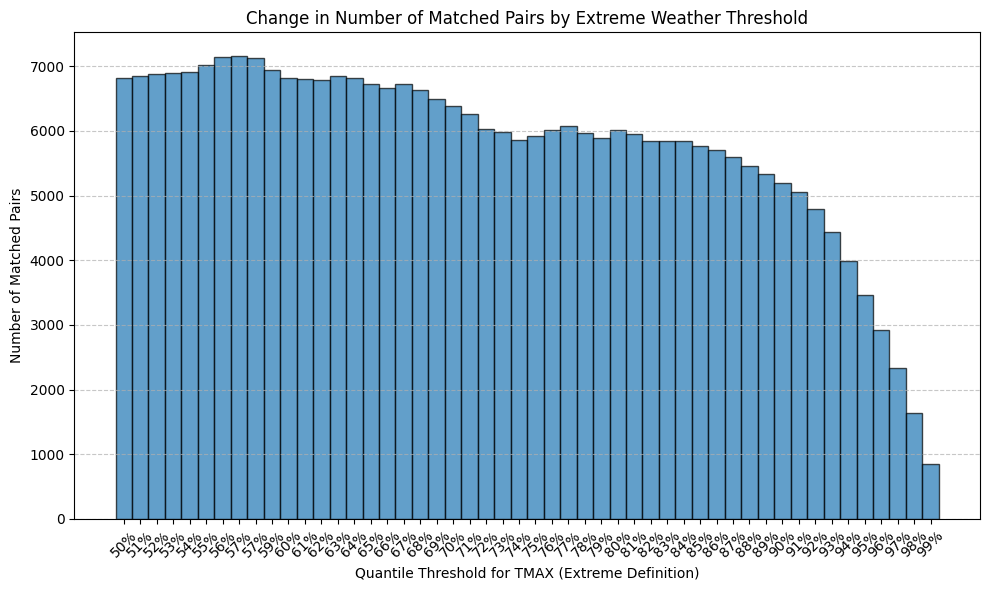

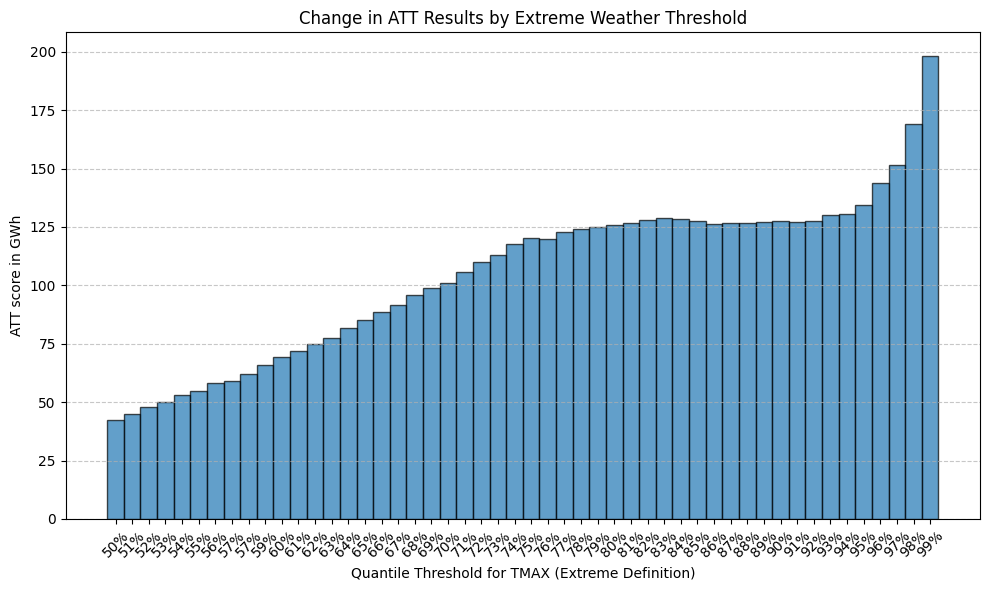

In [42]:
# Create range of quantiles

import numpy as np

quantiles = np.linspace(0.50, 0.99, 50)
# This code runs over a range of quantiles, re-calculating the ATT based on different quantile thresholds for maximum temperature

att_results = []
matching_results = []


for q in quantiles:
    tmax_threshold = combined_data['TMAX'].quantile(q)

    combined_data['Extreme'] = (combined_data['TMAX'] > tmax_threshold).astype(int)

    treated = combined_data[combined_data['Extreme'] == 1]
    untreated = combined_data[combined_data['Extreme'] == 0]

    matched_pairs = pd.merge(
        treated,
        untreated,
        on=matching_covariates,
        suffixes=('_treated', '_untreated')
    )

    att = (matched_pairs['D_treated'] - matched_pairs['D_untreated']).mean()

    matching_results.append(len(matched_pairs))

    att_results.append(att)

  # Matched Pairs
plt.figure(figsize=(10, 6))
plt.bar(quantiles, matching_results, width=0.01, edgecolor='black', alpha=0.7, label='Matched Pairs')
plt.xlabel('Quantile Threshold for TMAX (Extreme Definition)')
plt.ylabel('Number of Matched Pairs')
plt.title('Change in Number of Matched Pairs by Extreme Weather Threshold')
plt.xticks(quantiles, labels=[f"{int(q * 100)}%" for q in quantiles], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Matched_Chart_with_Grid.png")
plt.show()

# ATT Results
plt.figure(figsize=(10, 6))
plt.bar(quantiles, att_results, width=0.01, edgecolor='black', alpha=0.7, label='ATT Results')
plt.xlabel('Quantile Threshold for TMAX (Extreme Definition)')
plt.ylabel('ATT score in GWh')
plt.title('Change in ATT Results by Extreme Weather Threshold')
plt.xticks(quantiles, labels=[f"{int(q * 100)}%" for q in quantiles], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("ATT_Chart_with_Grid.png")
plt.show()

Of note: The ATT value appears to steadily increase as the quantile threshold increases, before flatenning from around 80% to 94%, and then exponentially increases from 95% to 99%. Observing this is relevant as it shows that infrastructure to account for the demand of these 5% events are incredibly important, and also shows that there is little change in demand between the 77% and 93% quantiles.

In [43]:
# Create ATT dictionary

quantile_to_att = dict(zip(quantiles, att_results))

What is shown below is that despite having a 5 degree separation, less than the 77-93% quantile's of 7 degrees, the difference between the demand is significantly higher between the 99% and 93% quantile. In fact, the expected difference in demand caused by 95.7 degree max temperatures and 90.6 degrees is over 9 times higher than the same difference between 90.6 and 83.5 degree temperatures.

In [44]:
# Calculate quantile differences and display respective temperatures.

lower = combined_data['TMAX'].quantile(.8)
upper = combined_data['TMAX'].quantile(.93)

att_difference = quantile_to_att[.9299999999999999] - quantile_to_att[.77]

print("77% Quantile: ", lower, "degrees")
print("93% Quantile: ", upper, "degrees")
print("ATT difference: ", att_difference)


77% Quantile:  85.21995336883661 degrees
93% Quantile:  90.6246949980801 degrees
ATT difference:  7.531674789268678


In [45]:
# Calculate quantile differences and display respective temperatures.

lower = combined_data['TMAX'].quantile(.93)
upper = combined_data['TMAX'].quantile(.99)

att_difference = quantile_to_att[.99] - quantile_to_att[.9299999999999999]

print("93% Quantile: ", lower, "degrees")
print("99% Quantile: ", upper, "degrees")
print("ATT difference: ", att_difference)

93% Quantile:  90.6246949980801 degrees
99% Quantile:  95.73183437842142 degrees
ATT difference:  68.1296714916337


**Inverse Propensity Weighting**

Below was our attempt at utilizing IPW to estimate the causal effect, though the rarity of the events made this a problematic method. Other parameters were tried along with transformations of those parameters, though the resulting propensity scores either remained too low or too close to 1.

In [46]:
X = combined_data[['dotw', 'month', 'year', 'Significant_Rain', 'Significant_Snow', 'Significant_Wind']]
y = combined_data['Extreme']
# Fit logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [47]:
# Obtain propensity scores

propensity_scores = model.predict_proba(X)[:, 1]
propensity_df = pd.DataFrame(propensity_scores, columns=['Propensity Score'])
propensity_df

,Propensity Score
0,0.005629
1,0.006688
2,0.007945
3,0.002820
4,0.001401
...,...
2794,0.015515
2795,0.018401
2796,0.021810
2797,0.010940


In [48]:
# As you can see, propensity scores come out much too small

propensity_df.describe()

,Propensity Score
count,2799.000000
mean,0.010004
std,0.006251
min,0.000533
25%,0.005439
50%,0.008753
75%,0.013263
max,0.031204


In [49]:
combined_data['pscore'] = propensity_scores
# Calculate the trimmed IPW estimate (currently commented out due to division by zero error from small scores)

"""
narrowed_prop = combined_data[(combined_data['pscore'] > 0.1) & (combined_data['pscore'] < 0.9)]
n = len(narrowed_prop)
treated_rows_cleaned = narrowed_prop.loc[narrowed_prop['Extreme'] == 1].copy()
untreated_rows_cleaned = narrowed_prop.loc[narrowed_prop['Extreme'] == 0].copy()
treated_rows_cleaned['Weighted Demand'] = treated_rows_cleaned['D'] * (1 / treated_rows_cleaned['pscore'])
untreated_rows_cleaned['Weighted Demand'] = untreated_rows_cleaned['D'] * (1 / (1 - untreated_rows_cleaned['pscore']))
trimmed_ipw_estimate = ((1 / n) * treated_rows_cleaned['Weighted Demand'].sum()) - ((1 / n) * untreated_rows_cleaned['Weighted Demand'].sum())
trimmed_ipw_estimate
"""

"\nnarrowed_prop = combined_data[(combined_data['pscore'] > 0.1) & (combined_data['pscore'] < 0.9)]\nn = len(narrowed_prop)\ntreated_rows_cleaned = narrowed_prop.loc[narrowed_prop['Extreme'] == 1].copy()\nuntreated_rows_cleaned = narrowed_prop.loc[narrowed_prop['Extreme'] == 0].copy()\ntreated_rows_cleaned['Weighted Demand'] = treated_rows_cleaned['D'] * (1 / treated_rows_cleaned['pscore'])\nuntreated_rows_cleaned['Weighted Demand'] = untreated_rows_cleaned['D'] * (1 / (1 - untreated_rows_cleaned['pscore']))\ntrimmed_ipw_estimate = ((1 / n) * treated_rows_cleaned['Weighted Demand'].sum()) - ((1 / n) * untreated_rows_cleaned['Weighted Demand'].sum())\ntrimmed_ipw_estimate\n"

**Research Question 2:**
Do time-based features predict electricity demand?

In [50]:
data = master.copy()
data['D'] = data['D'] / 1000 # I am changing the units from Megawatts to Gigawatts

In [51]:
# summing all regions of each hour into a singular row for each hour of each day
all_regions_by_day = data.groupby(['Local date', 'Hour', 'day', 'month', 'year', 'dotw'], as_index=False).agg({'D': 'sum'})
all_regions_by_day

,Local date,Hour,day,month,year,dotw,D
0,2019-01-01,0,1,1,2019,1,385.191
1,2019-01-01,1,1,1,2019,1,376.938
2,2019-01-01,2,1,1,2019,1,370.029
3,2019-01-01,3,1,1,2019,1,365.565
4,2019-01-01,4,1,1,2019,1,365.580
...,...,...,...,...,...,...,...
51529,2024-11-16,19,16,11,2024,5,441.486
51530,2024-11-16,20,16,11,2024,5,435.284
51531,2024-11-16,21,16,11,2024,5,426.996
51532,2024-11-16,22,16,11,2024,5,416.985


**Frequentist GLM**

Linear Regression

The linear regression model could be a good fit. It supports all real numbers. This model assumes that the response variable (electricty demand), is normally distributed around the linear predictors. Thus, we know that the likelihood function is Gaussian, the inverse link is identity, and the link function is also inverse. Electricity demand is continous and can take on a wide variety of values. The one assumption we are making is that we are expecting the predictos to showcase a straightforward relationships with the response variable.

In [54]:
y = all_regions_by_day['D']  # demand
X = all_regions_by_day[['Hour', 'dotw', 'month']]  # predictors
X = sm.add_constant(X)
gaussian_model = sm.GLM(y, X, family=sm.families.Gaussian())
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      D   No. Observations:                51534
Model:                            GLM   Df Residuals:                    51530
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          4754.6
Method:                          IRLS   Log-Likelihood:            -2.9129e+05
Date:                Sat, 14 Dec 2024   Deviance:                   2.4501e+08
Time:                        22:41:43   Pearson chi2:                 2.45e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2434
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.0801      0.939    439.946      0.0

we look at the log-likehood to calculate the AIC, and also look at the r-squared

**Bayesian GLM**

Now that we have examined the Frequentists lens, let's shift into a Bayesian perspective. This might be particuarly useful since we can incorporate prior knowledge and beliefs in the modeling process. Some key components of Bayesian regression are the prior distribution, likelihood, and posterior distribution.

In [56]:
gaussian_b_model = bmb.Model(formula='D ~ Hour + dotw + month', data=all_regions_by_day, family="gaussian")
gaussian_trace = gaussian_b_model.fit(random_seed=0)

Output()

Output()

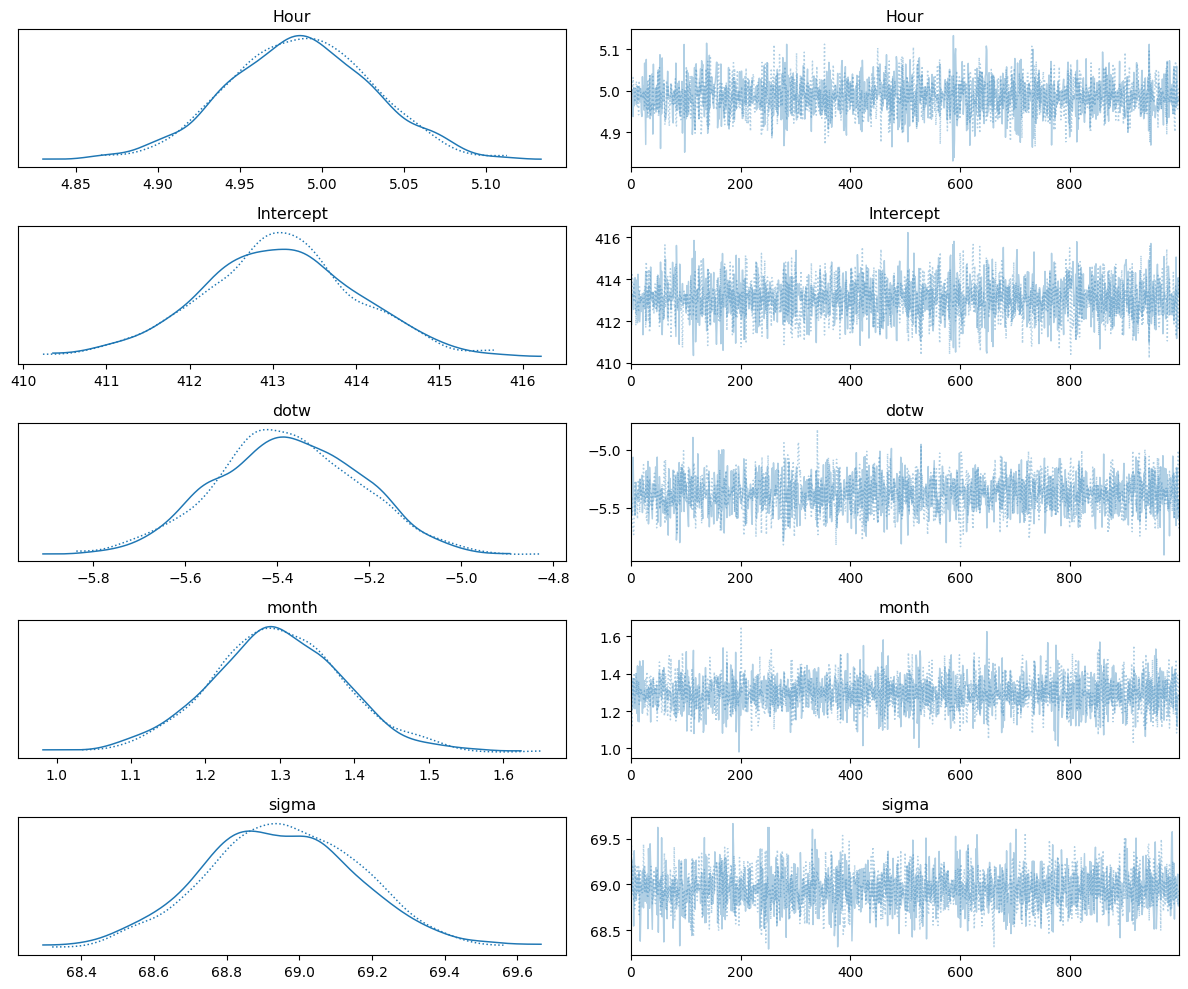

In [57]:
az.plot_trace(gaussian_trace)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


<Axes: xlabel='D'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


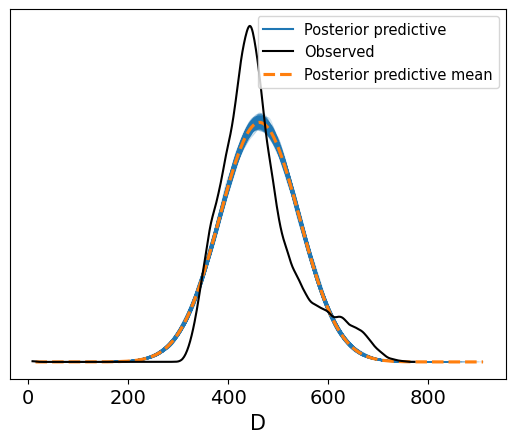

In [58]:
# Posterior Predictive Check
gaussian_posterior_predictive = gaussian_b_model.predict(idata=gaussian_trace, kind='pps')
az.plot_ppc(gaussian_trace, kind='kde', data_pairs={"y": "D"})

/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (51539) in plot_posterior, generating only 40 plots
  warnings.warn(


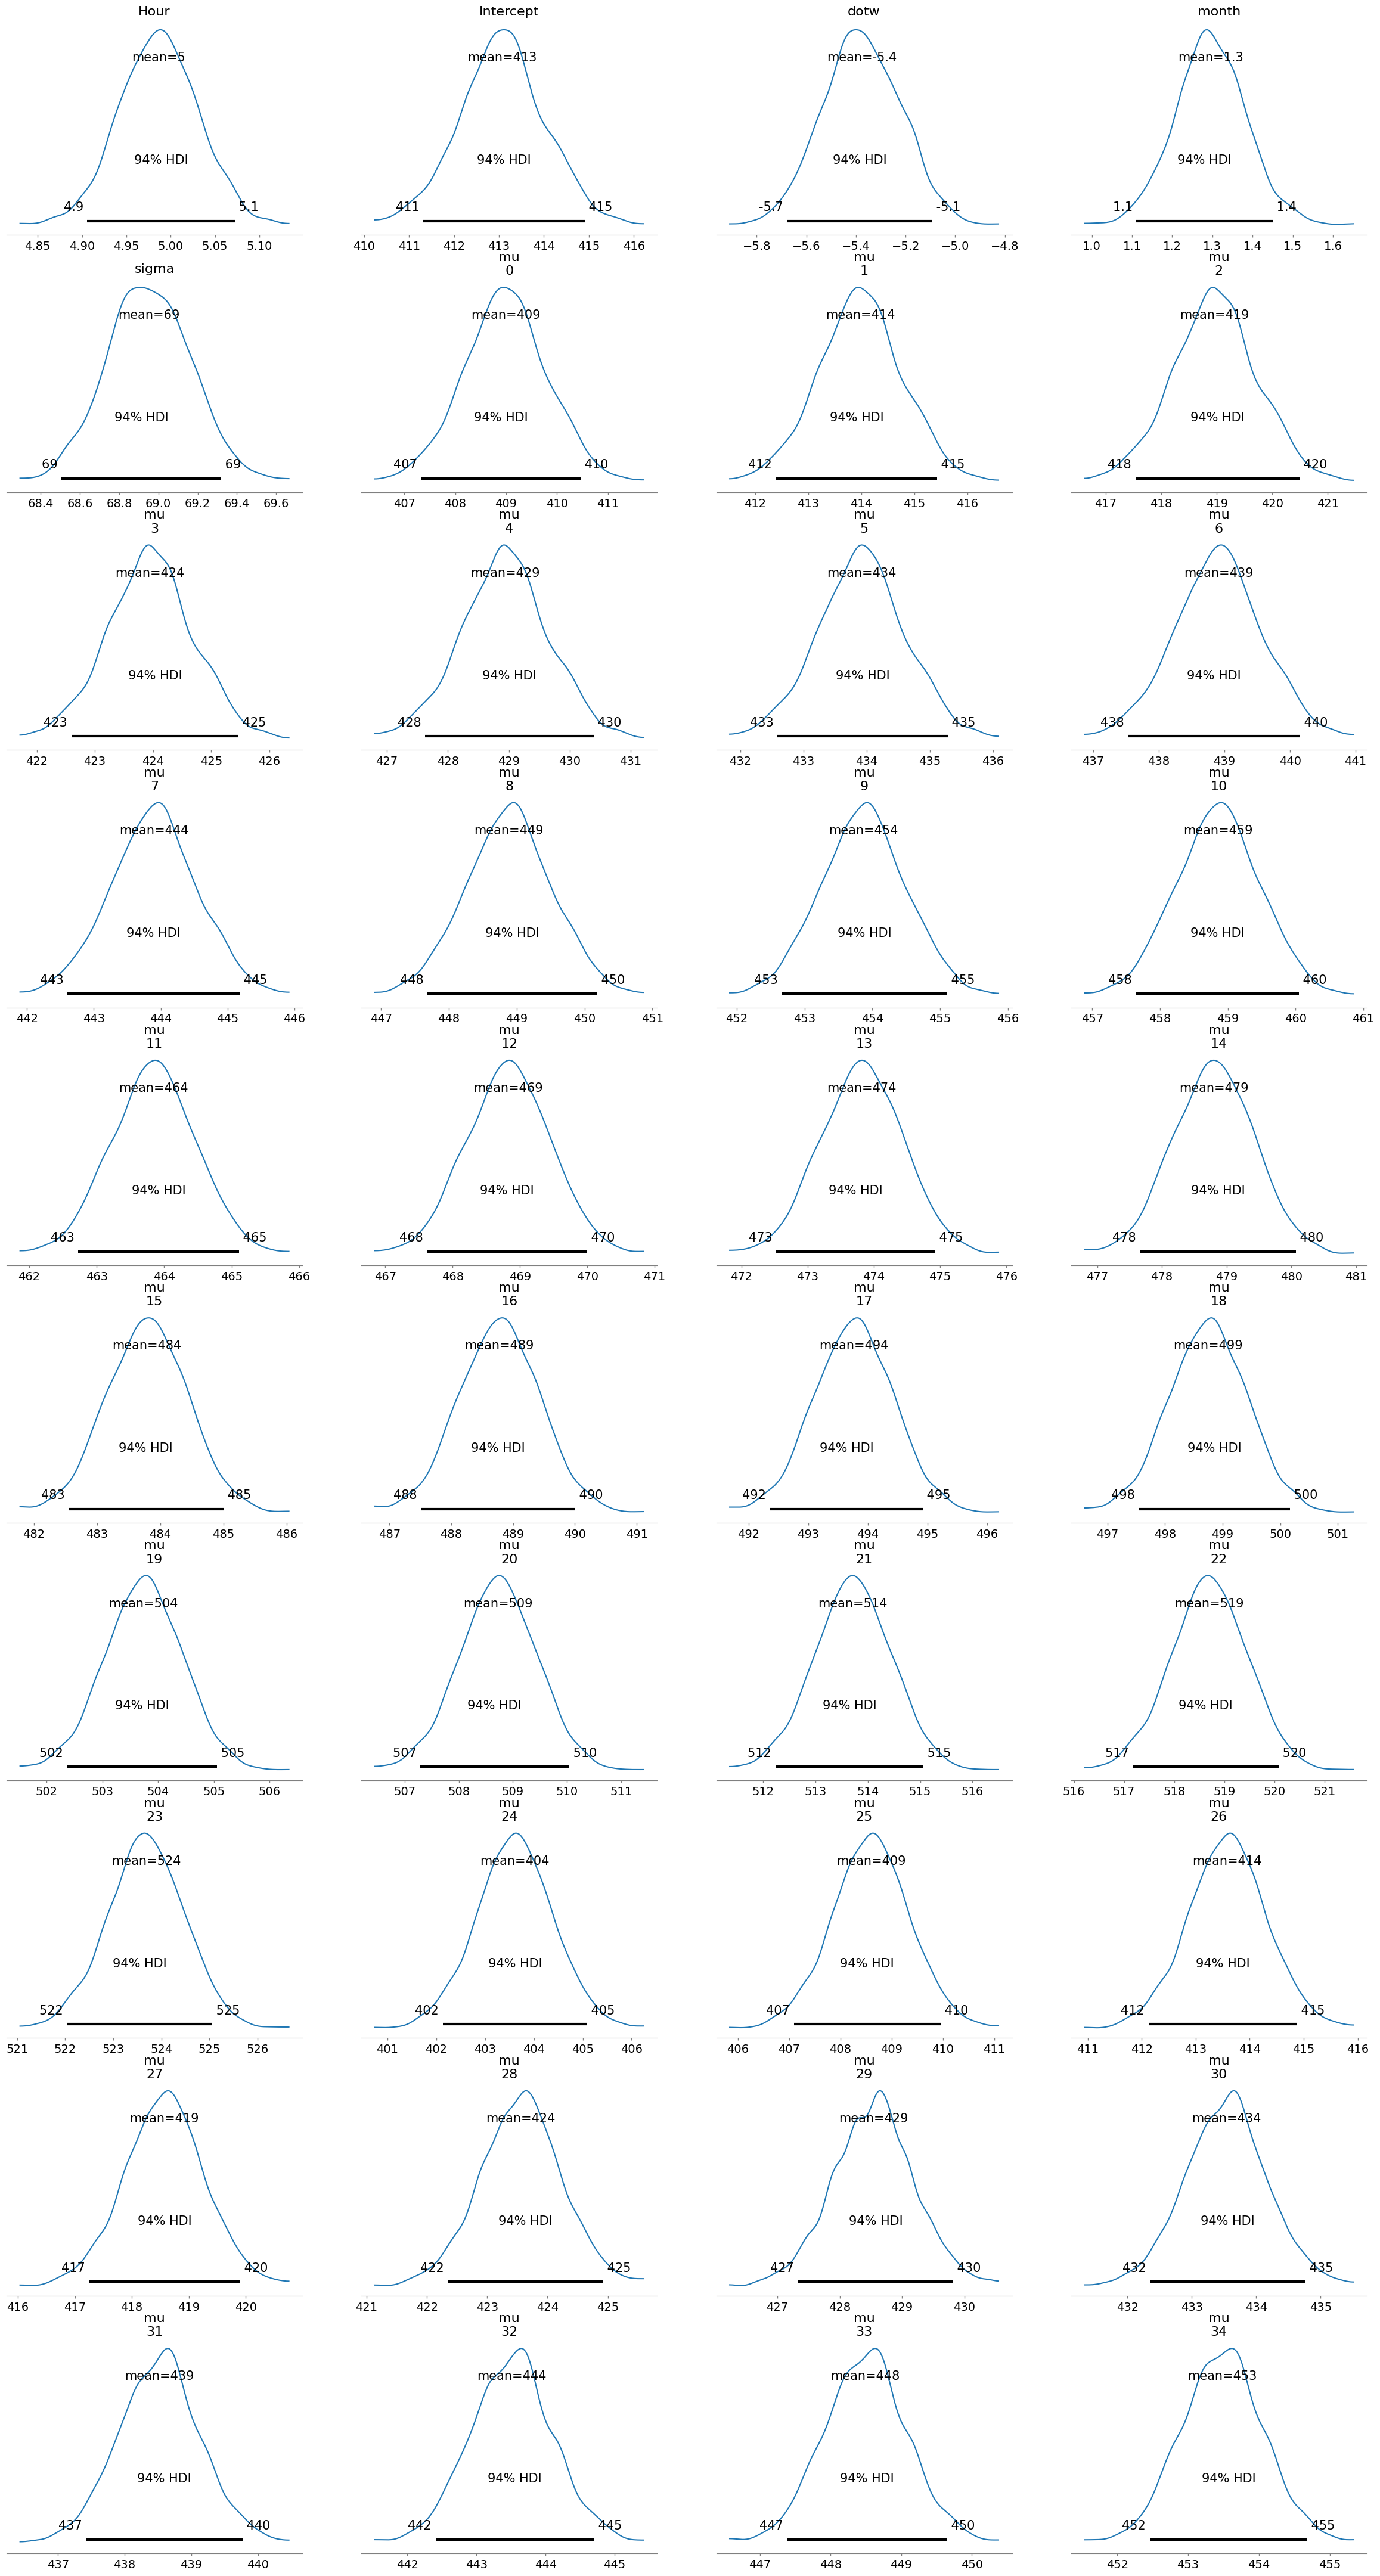

In [59]:
# Bayesian Uncertainty
az.plot_posterior(gaussian_trace);

**Non-Parametric Models**

Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Define the response variable and predictors
y = all_regions_by_day['D']  # Response variable
X = all_regions_by_day[['Hour', 'dotw', 'month']]  # Predictors

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Training
tree_model.fit(X_train, y_train)

# Outcome
y_pred = tree_model.predict(X_test)

# Error Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 40.109578519486824
R-squared: 0.7337486596881291


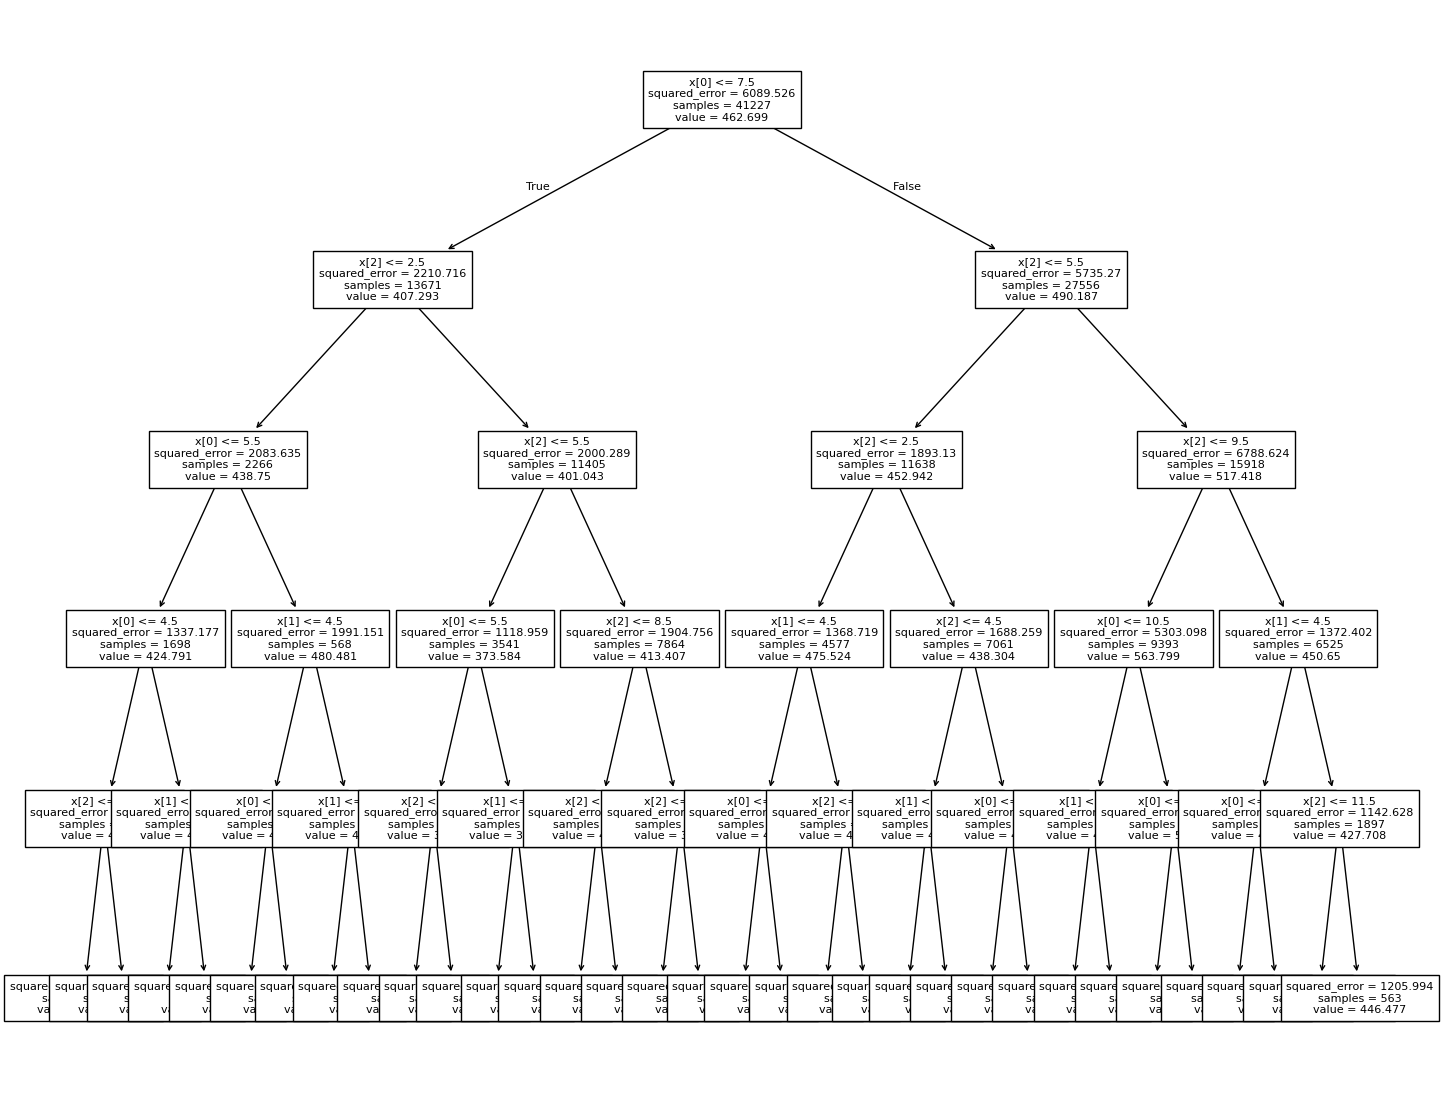

In [61]:
# in terms of putting this in our final report, we need to truncare it to about depth of 3 for visualization purposes
clf = tree_model
fig, ax = plt.subplots(figsize=(17, 14))
tree.plot_tree(clf, fontsize=8);

Random Forest Regressor

In [62]:
y = all_regions_by_day['D']
X = all_regions_by_day[['Hour', 'dotw', 'month']]  # predictors

# training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# training
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)

# error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 29.969417210381753
R-squared: 0.851354351051766


Random Forest Regression (RFS) outperforms the Decision Tree (DT) model. The RMSE are 29.97 and 40.11 respectively. The  𝑟2  are 0.73 and 0.85 respectively.

See more in-depth discussion on written report! Thanks!